In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("Titanic-Dataset.csv" , usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df['Age'].fillna(df['Age'].mean(),inplace=True) # FOr filling the missing values in the column Age

In [5]:
df.isnull().any()

Survived    False
Age         False
Fare        False
dtype: bool

In [6]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [7]:
# For feature engineering we alwayd do train test split before doing anything
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

C:\Users\spars\AppData\Local\Temp\ipykernel_10340\2128926687.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


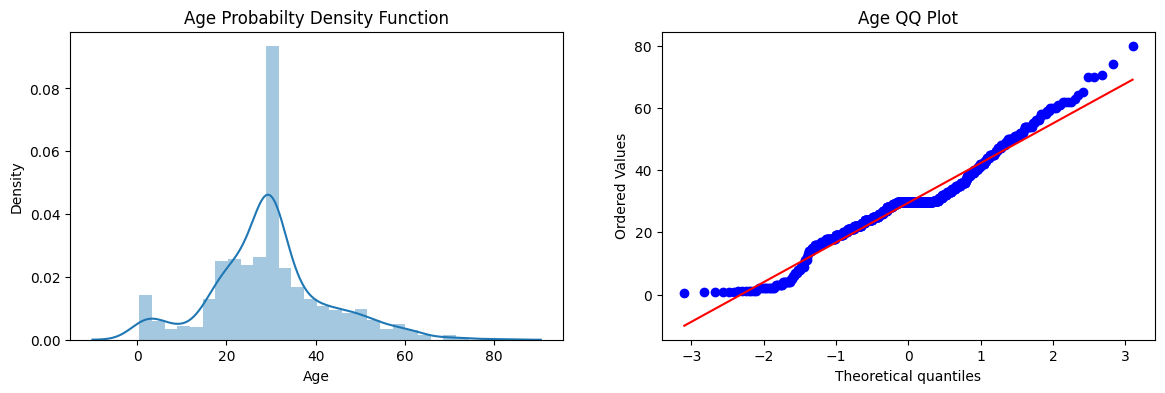

In [9]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age Probabilty Density Function')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

C:\Users\spars\AppData\Local\Temp\ipykernel_10340\2612548910.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


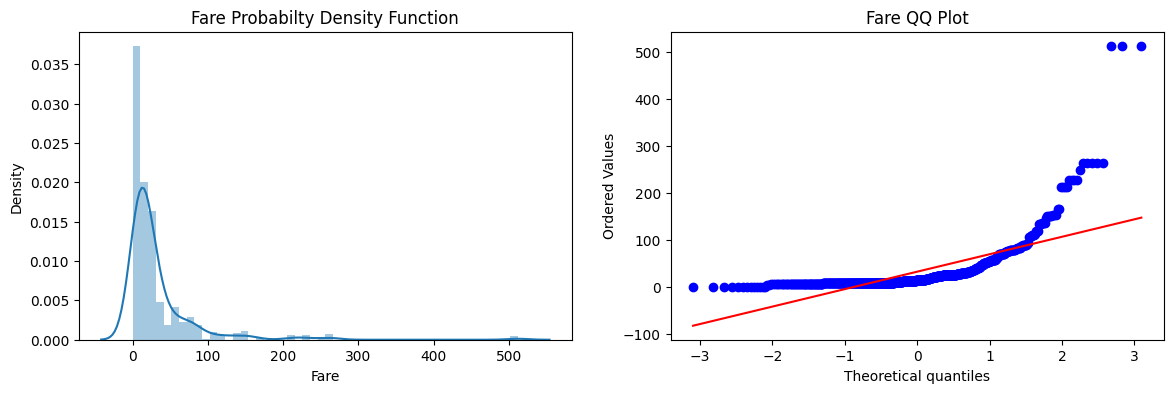

In [10]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare Probabilty Density Function')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

## As we can see here that our data is right skewed for Fare Column

In [11]:
# Before Applying Function Transformer accuracy of our models

LR = LogisticRegression()
DTC = DecisionTreeClassifier()

LR.fit(X_train,y_train)
DTC.fit(X_train,y_train)
    
y_pred = LR.predict(X_test)
y_pred1 = DTC.predict(X_test)
    
print("Accuracy Logistic Regression",accuracy_score(y_test,y_pred))
print("Accuracy Decision Tree",accuracy_score(y_test,y_pred1))

Accuracy Logistic Regression 0.6480446927374302
Accuracy Decision Tree 0.6536312849162011


In [12]:
trf = FunctionTransformer(func=np.log1p) # Here we can also use np.log but we usualy use np.log1p b/s if the column has 0 as the value so this function will first add 1 in each of its values then apply log.

X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [14]:
LR_transformed = LogisticRegression()
DTC_transformed = DecisionTreeClassifier()

LR_transformed.fit(X_train_transformed,y_train)
DTC_transformed.fit(X_train_transformed,y_train)
    
y_pred = LR_transformed.predict(X_test_transformed)
y_pred1 = DTC_transformed.predict(X_test_transformed)
    
print("Accuracy Logistic Regression after Applying log transform",accuracy_score(y_test,y_pred))
print("Accuracy Decision Tree after Applying log transform",accuracy_score(y_test,y_pred1))

Accuracy Logistic Regression after Applying log transform 0.6815642458100558
Accuracy Decision Tree after Applying log transform 0.6815642458100558


In [15]:
X_transformed = trf.fit_transform(X)

LR_transformed = LogisticRegression()
DTC_transformed = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(LR_transformed,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(DTC_transformed,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6599875156054931


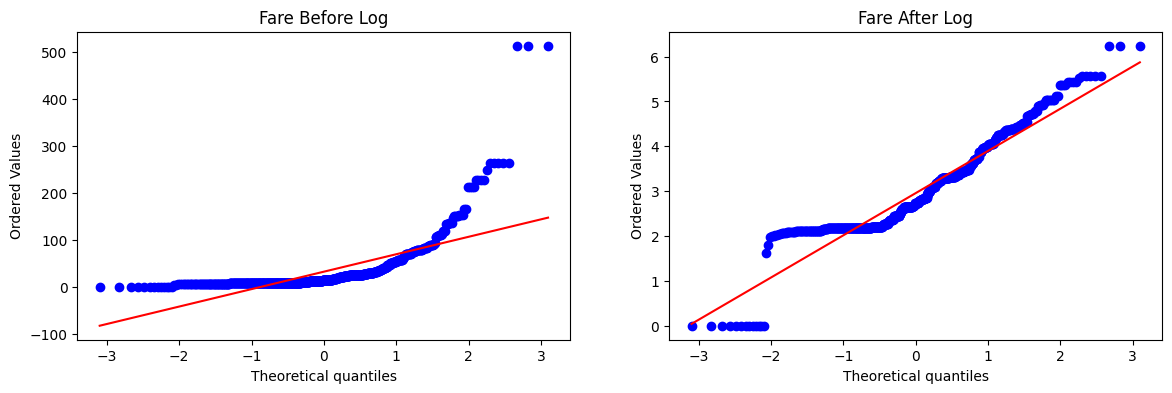

In [16]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

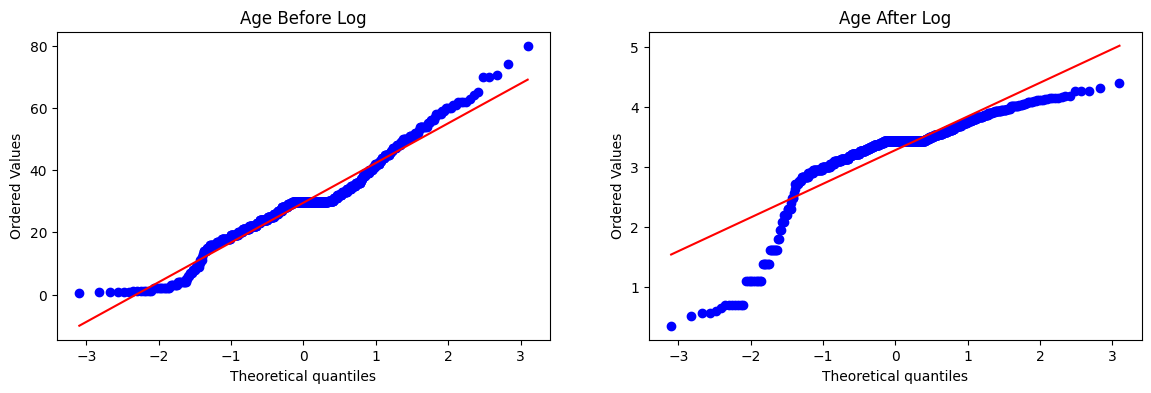

In [17]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

## So here we can see that if we apply log transform in Age column then our data is getting more imbalanced so it is prefferable not to use log tranform on the data which is not right skewed

In [20]:
# Define transformations for each model
trf_log = ColumnTransformer([('log', FunctionTransformer(func=np.log1p), ['Fare'])], remainder='passthrough')
trf_tree = ColumnTransformer([('log', FunctionTransformer(func=np.log1p), ['Fare'])], remainder='passthrough')

# Apply transformations separately for each model
X_train_transformed_log = trf_log.fit_transform(X_train)
X_test_transformed_log = trf_log.transform(X_test)

X_train_transformed_tree = trf_tree.fit_transform(X_train)
X_test_transformed_tree = trf_tree.transform(X_test)

# Initialize classifiers
clf_log = LogisticRegression()
clf_tree = DecisionTreeClassifier()

# Train each model on its respective transformed data
clf_log.fit(X_train_transformed_log, y_train)
clf_tree.fit(X_train_transformed_tree, y_train)

# Make predictions
y_pred_log = clf_log.predict(X_test_transformed_log)
y_pred_tree = clf_tree.predict(X_test_transformed_tree)

# Calculate and print accuracies
print("Accuracy LR:", accuracy_score(y_test, y_pred_log))
print("Accuracy DT:", accuracy_score(y_test, y_pred_tree))

Accuracy LR: 0.6703910614525139
Accuracy DT: 0.6536312849162011


In [21]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    

Accuracy 0.6195131086142323


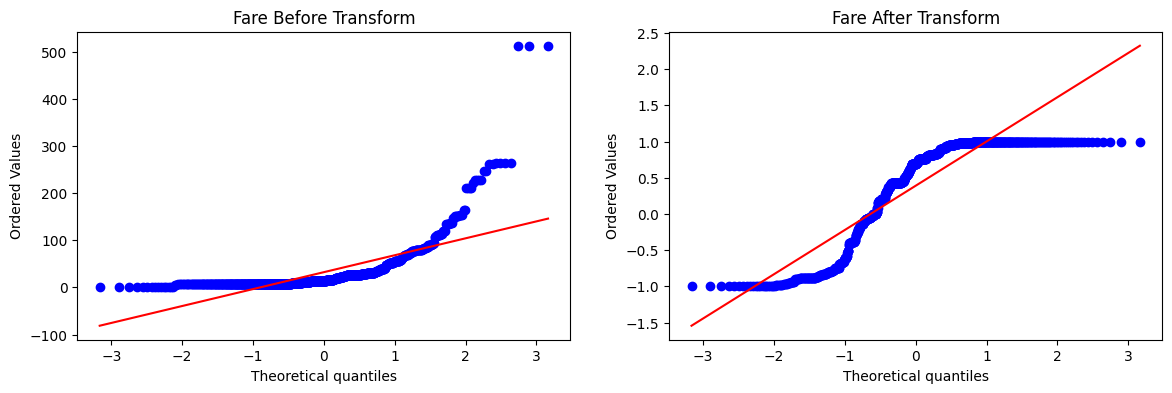

In [22]:
apply_transform(np.sin)

In [23]:
apply_transform(lambda x: 1)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2925712780.py, line 1)